## **Описание таблицы**

Данные содержат 14 столбцов:
- `Unnamed` - индекс строчки
- `country` - Страна, где произведено вино
- `description` - описание вкуса вина
- `designation` - Виноградник на территории винодельни, где выращивают виноград
- `points` - оценка вина в баллах от 1 до 100
- `price` - цена за бутылку виеа
- `province` - Провинция или штат, из которого произведено вино
- `region_1` - Район выращивания вина в провинции или штате 
- `region_2` - Иногда в винодельческой области указываются более конкретные регионы
- `taster_name` - Имя дегустатора
- `taster_twitter_handle` - Твиттер дегустатора
- `title` - Название обзора вин с датой выпуска
- `variety` - Сорт винограда, из которого делают вино
- `winery` - Винодельня

## **Почему именно этот датасет?**

Вино - один из самых изысканных, ароматных, богатых, популярных алгольных напитков в наше время. Это "билет" в мир элиты.

Истинных ценителей вина часто зовут на светские мероприятия, многие известные люди становятся членами клубов виноделов, продажи этого алкогольного напитка с каждым годом все возрастают. Все это только подтверждает, что вино - тренд, который никогда не выйдет из моды, ведь в нем каждый может раскрыть свои собственные вкусовые способности и найти что-то уникальное и совершенно новое.

Нам очень захотелось разобраться в феномене популярности вина, рассмотреть основные тенденции в этой области, выявить мировые закономерности, узнать что-то новое об интересном мире вина и виноделия, а также найти ответы на собственные вопросы. 

## **Для кого этот датасет и наш анализ?**

Мы уверены, что для каждого человека будет очень полезным и интерсеным узнать об основных тенденциях в винной области, просветиться, ведь действительно, вино - это об искустве, а значит, оно несомненно не оставит никого равнодушным. Также, например, узнав о том, какие сорта винограда сейчас наиболее продаваемы, можно подобрать себе хороший напиок на вечер:)

Всем, кто занимается вином: виноделам, владельцам винных магазинов, работникам в сфере вина, - всегда нужна актуальная и свежая информация о том, что сейчас происходит в этой области, поэтому, без сомнений, для них данный датасет будет очень полезен для анализа.

https://www.kaggle.com/datasets/zynicide/wine-reviews - про вино

In [ ]:
%%capture
import pandas as pd
!pip install ridgeplot
!pip install fitter
from ridgeplot import ridgeplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import re
from fitter import Fitter, get_common_distributions, get_distributions
%config InlineBackend.figure_format = 'svg'

In [ ]:
link1 = 'https://raw.githubusercontent.com/IYunet/VIM-2022/main/3%20task/winemag-data-130k-v2.csv'

db = pd.read_csv(link1)
db

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


## 1. Есть взаимосвязь между оценкой вина и его ценой 

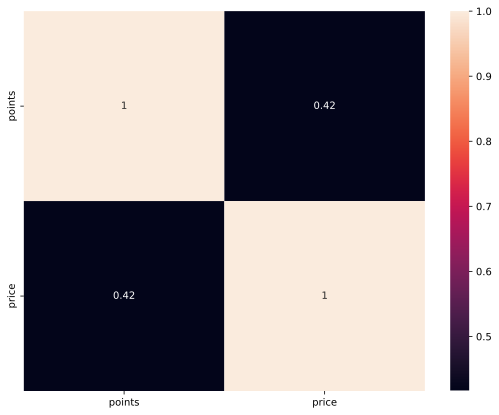

In [ ]:
# Numeric columns of the dataset
numeric_col = ['points', 'price']

# Correlation Matrix formation
corr_matrix = db.loc[:,numeric_col].corr()

#Using heatmap to visualize the correlation matrix
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True)

**ВЫВОД:** Гипотеза подтвердилась, цена и оценки взаимосвязаны, так как коэфициент корреляции между ценой и оценкой 0.42

## 2. Самые популярные страны-производители вина: Франция, Италия, Грузия

<BarContainer object of 10 artists>

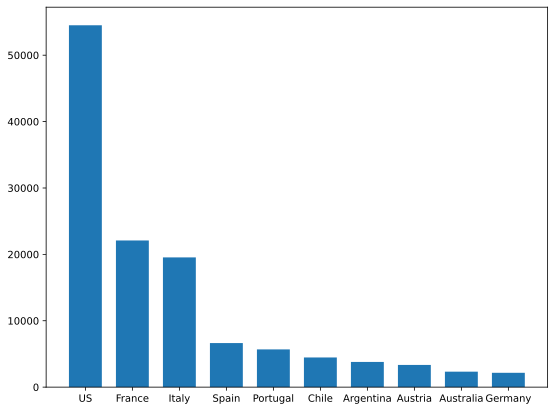

In [ ]:
pop_contry = db.groupby('country').count().reset_index().nlargest(10, 'description')

plt.figure(figsize=(9, 7))
plt.bar(x=pop_contry.country, height=pop_contry.description, width=0.7)

**ВЫВОД:** Гипотеза оказалось частично верной: самые поплурные страны производители: США, Франция, Италия. Грузия не вошла даже в топ-10 стран.

## 3. Самые низкие оценки вина ставил Alexander Peartree 

<BarContainer object of 19 artists>

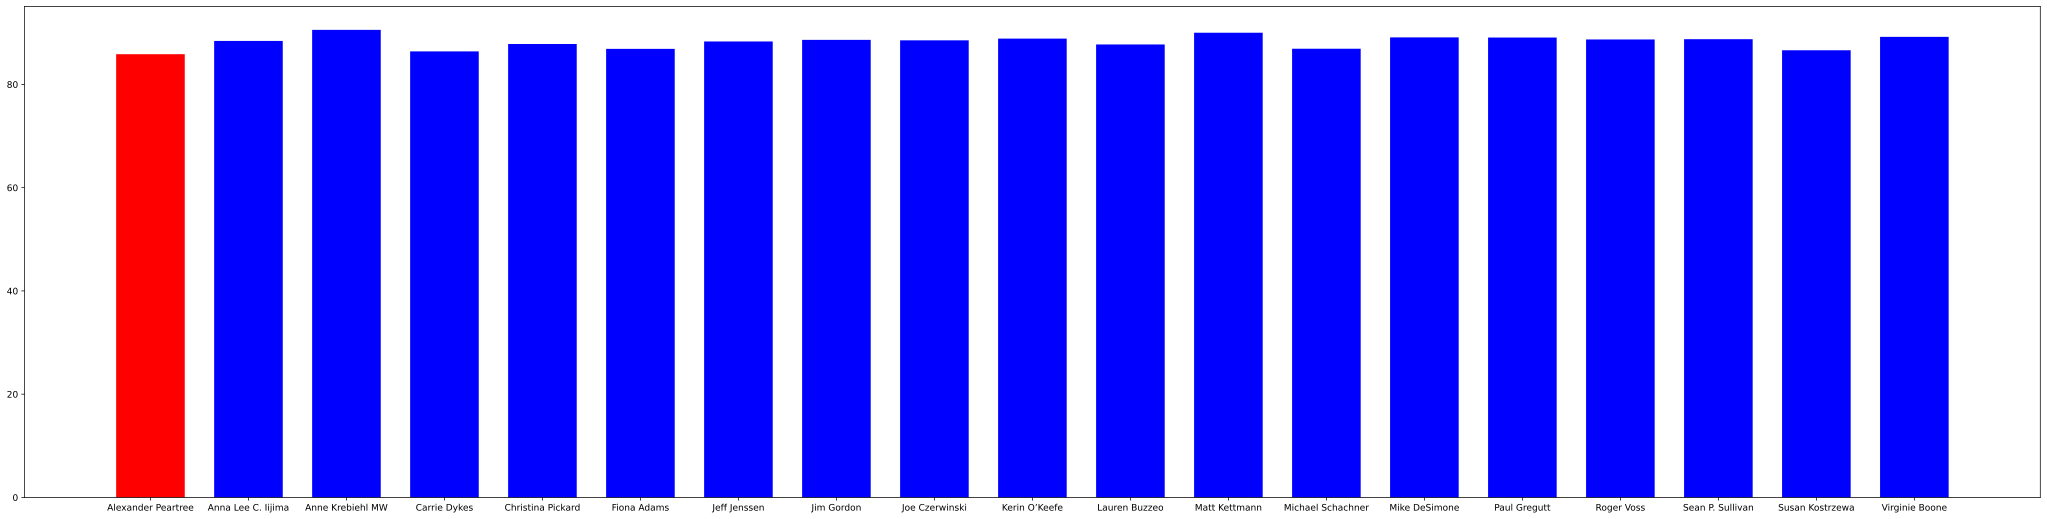

In [ ]:
less_point = db.groupby("taster_name").mean("points").reset_index()
min = less_point.nsmallest(1,'points')

col = []
for val in less_point.points:
  if val == min.points[0]:
    col.append('red')
  else:
    col.append('blue')

plt.figure(figsize=(40, 10))
plt.bar(x=less_point.taster_name, height=less_point.points, width=0.7, color = col)

**ВЫВОД:** Гипотеза оказалось верной. За все время дегустирования, кавист Alexander Peartree выставлял винам маые низкие оценки. Что это может значить? 1. Он очень строгий и эстетичный дегустатор 2. Некомпетентный специалист 3. Спецаиально занижал цену винам, чтобы понизить их популярность и стоимость 

## 4. В некоторых провинциях производятся вина только одного сорта винограда(например, Oregon - Riesling)

In [ ]:
province_db = db.iloc[:,[6, 12]]
province_db = province_db.groupby(province_db.province).count().reset_index().rename(columns = {'variety':'sort_count'})
province_db = province_db[province_db.sort_count == 1]
province_db

,province,sort_count
9,Alenteo,1
18,Arcadia,1
34,Beotia,1
40,Breede River Valley,1
53,Canada Other,1
56,Cape Agulhas,1
63,Casablanca-Curicó Valley,1
67,Central Greece,1
73,Ceres Plateau,1
77,China,1


In [ ]:
pie_table = province_db.nsmallest(10, 'sort_count')
fig = px.pie(pie_table, names=pie_table.province, values=pie_table.sort_count, labels=pie_table.province, hole=.5 , title = "Number of sorts in different provinces")
fig.show()

**ВЫВОД:** Гипотеза потвердилась. Действительно, некоторые провинции являются моносортовыми в выращивании. Для визуализации были взяты некоторые из них для того, чтобы ненагромождать график 

## 5. Чем старше вино, тем выше у него оценки, начиная с 1900 года

In [ ]:
# отбор данных
import re

db_copy = db;
wine_y = pd.DataFrame() 

year = []
point =[]
for i in range(129971):
      year1 = re.findall('[0-9]+', db.title[i])
      year.append(year1)
      point += [db_copy.points[i]]
      try:
         year[i] 
      except IndexError:
         year.append('-1')

wine_y["year_wine"] = year

year = []
for val in wine_y.year_wine:
  try:
    year += [int(val[0])]
  except IndexError:
    year += [-1]

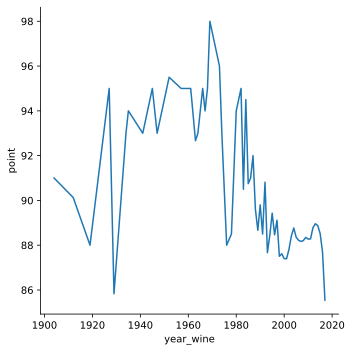

In [ ]:
wine_y["year_wine"] = year
wine_y["point"] = point

wine_y = wine_y.loc[(wine_y.year_wine > 1900) & (wine_y.year_wine < 2023)]
wine_order_by_y = wine_y.groupby('year_wine').mean('point').reset_index()

sns.relplot(data=wine_order_by_y, x="year_wine", y="point", kind="line")

**ВЫВОД:** Гипотеза не подтвердилась. Из графика видно, что ценообразование не зависит от возраста вина.

## 6. Распределение производства вин в в провинциях US - нормальное

In [ ]:
US_db = db[db.country == "US"]
US_province = US_db.iloc[:,[6,12]]
US_province = US_province.groupby(US_province.province).count().reset_index().rename(columns = {'variety':'sort_count'})
US_province

,province,sort_count
0,America,95
1,Arizona,41
2,California,36247
3,Colorado,68
4,Connecticut,3
5,Hawaii,1
6,Idaho,192
7,Illinois,6
8,Iowa,4
9,Kentucky,1


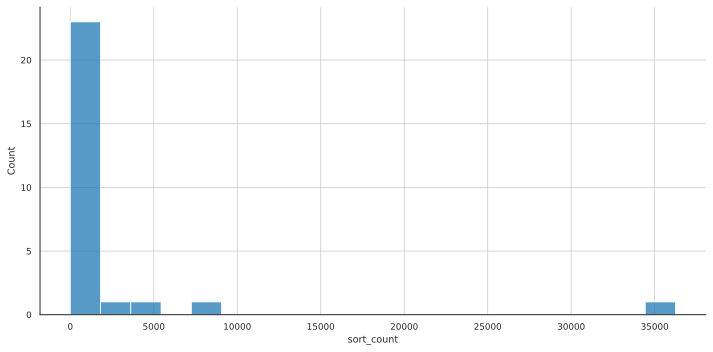

In [ ]:
sns.set_style('white')
sns.set_context("paper")
sns.displot(data=US_province, x="sort_count", kind="hist", bins=20, aspect=2)
plt.grid();

Распределение явно не нормальное, попробуем подобрать, взяв экспоненциальное распределение и распределение Пирсона

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
pearson3,0.000002,3677.923216,-429.194420,inf,0.561550,1.480772e-08
expon,0.000004,3322.370923,-420.464832,inf,0.724494,6.197730e-15


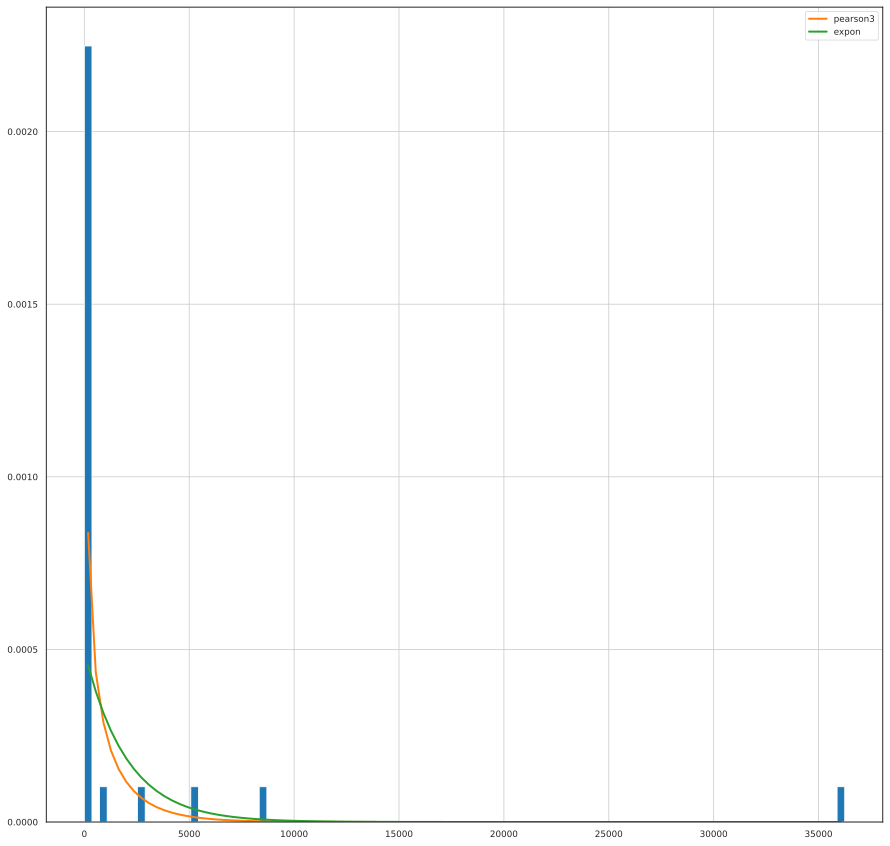

In [ ]:
plt.figure(figsize=(15,15))
f = Fitter(US_province.sort_count, distributions=["expon", "pearson3"])
f.fit()
f.summary()

**ВЫВОД**: Гипотеза не подтвердилась. Распределение получилось ненормальным, да и присутсуют пустые значения. Из графика видно, что распределение больше похоже на распределение Пирсона

## 7. Белые вина чаще производятся, чем красные 

In [ ]:
#будем рассматривать по 10 самым популярным
wines_db =  db.iloc[:, [1,12]]
wines_db  = wines_db.groupby(wines_db.variety).count().reset_index().rename(columns = {'country':'wines_count'})
wines_db = wines_db.nlargest(10,'wines_count').reset_index(drop=True)
wines_db

,variety,wines_count
0,Pinot Noir,13269
1,Chardonnay,11750
2,Cabernet Sauvignon,9470
3,Red Blend,8935
4,Bordeaux-style Red Blend,6915
5,Riesling,5188
6,Sauvignon Blanc,4963
7,Syrah,4142
8,Rosé,3563
9,Merlot,3101


In [ ]:
#разделение на белое и красное
white_wines = ['Chardonnay', 'Cabernet Sauvignon', 'Riesling', 'Sauvignon Blanc']
wines_db['kind_of_wine'] = wines_db.apply(lambda _: '', axis=1) 
for i in range(wines_db.shape[0]):
  if wines_db.variety[i] in white_wines:
    wines_db.kind_of_wine[i] = "white" 
  else:
    wines_db.kind_of_wine[i] = "red"
#считаем продажи красных и белых
wines_db = wines_db.groupby(wines_db.kind_of_wine)['wines_count'].sum().reset_index()
wines_db

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,kind_of_wine,wines_count
0,red,39925
1,white,31371


([<matplotlib.patches.Wedge at 0x7f17712d1190>,
 [Text(-0.2060832368777592, 1.0805228824407125, 'red'),
  Text(0.2060832368777591, -1.0805228824407125, 'white')],
 [Text(-0.11240903829695956, 0.589376117694934, '56.0%'),
  Text(0.11240903829695949, -0.589376117694934, '44.0%')])

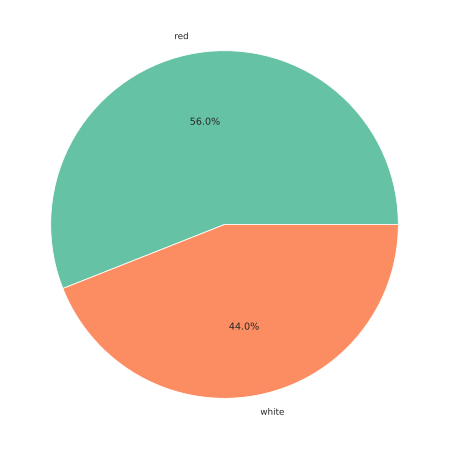

In [ ]:
p_table = pd.crosstab(index=wines_db.kind_of_wine, values=wines_db.wines_count, columns=wines_db.wines_count, aggfunc="count").fillna(0)
sns.set_palette("Set2")
fig,ax = plt.subplots(figsize=(16, 8))
ax.pie(data = wines_db, x=wines_db.wines_count, labels=wines_db.kind_of_wine, autopct='%1.1f%%')

**ВЫВОД:** Гипотеза не потвердилась. Из диаграммы видно, что красных вин производят больше, чем белых

## 8. В 2013 году больше всего продали вин сорта Pinot Noir

In [ ]:
# отбор данных
db_copy = db

db_copy['year_of_creation'] = db_copy.apply(lambda _: '', axis=1) 
for i in range(db_copy.shape[0]):
      k = []
      k = re.findall(r'-?\d+\.?\d*', db_copy.title[i])
      if k != []:
        db_copy['year_of_creation'][i] = float(k[0])
      else: 
        continue
db_copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year_of_creation
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013.0
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004.0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013.0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012.0


In [ ]:
sort_db = db_copy.iloc[:,[12,14]]
sort_db = sort_db[sort_db.year_of_creation == 2013]
sort_db = sort_db.groupby(sort_db.variety).count().reset_index().rename(columns = {'year_of_creation':'sale_of_wines_in_2013'})
sort_db = sort_db.nlargest(10, 'sale_of_wines_in_2013').reset_index(drop=True)
sort_db

,variety,sale_of_wines_in_2013
0,Pinot Noir,2033
1,Chardonnay,1578
2,Cabernet Sauvignon,1231
3,Red Blend,1019
4,Bordeaux-style Red Blend,709
5,Riesling,701
6,Sauvignon Blanc,599
7,Syrah,573
8,Zinfandel,394
9,Portuguese Red,362


Text(0, 0.5, 'Kind of wine')

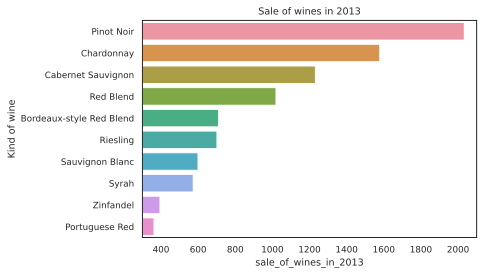

In [ ]:
sns.barplot(x = sort_db.sale_of_wines_in_2013, y = sort_db.variety)
plt.xlim(300, 2100)
plt.title('Sale of wines in 2013')
plt.ylabel("Kind of wine")

**ВЫВОД:** Гипотеза подтвердилась, самый продаваемый сорт вина в 2013 году - вина из сорта Pinot Noir